In [9]:
# !pip install backtrader
# !pip install yfinance --upgrade --no-cache-dir
# !pip install ipympl
# !pip install ipywidgets

In [49]:
# https://blog.quantinsti.com/backtrader/

import backtrader as bt
import yfinance as yf

class MAstrategy(bt.Strategy):
	# when initializing the instance, create a 100-day MA indicator using the closing price
	def __init__(self):
		self.ma = bt.indicators.SimpleMovingAverage(self.data.close, period=10)
		self.order = None
 
	def next(self):
		if self.order:
			return
		if not self.position: # check if you already have a position in the market
			if (self.data.close[0] > self.ma[0]) & (self.data.close[-1] < self.ma[-1]):
				self.log('Buy Create, %.2f' % self.data.close[0])
				self.order = self.buy(size=10) # buy when closing price today crosses above MA.
			if (self.data.close[0] < self.ma[0]) & (self.data.close[-1] > self.ma[-1]):
				self.log('Sell Create, %.2f' % self.data.close[0])
				self.order = self.sell(size=10)  # sell when closing price today below MA
		else:
		# This means you are in a position, and hence you need to define exit strategy here.
			if len(self) >= (self.bar_executed + 4):
				self.log('Position Closed, %.2f' % self.data.close[0])
				self.order = self.close()
 
	# outputting information
	def log(self, txt):
		dt=self.datas[0].datetime.date(0)
		print('%s, %s' % (dt.isoformat(), txt))
   
	def notify_order(self, order):
		if order.status == order.Completed:
			if order.isbuy():
				self.log(
				"Executed BUY (Price: %.2f, Value: %.2f, Commission %.2f)" %
				(order.executed.price, order.executed.value, order.executed.comm))
			else:
				self.log(
				"Executed SELL (Price: %.2f, Value: %.2f, Commission %.2f)" %
				(order.executed.price, order.executed.value, order.executed.comm))
			self.bar_executed = len(self)
		elif order.status in [order.Canceled, order.Margin, order.Rejected]:
			self.log("Order was canceled/margin/rejected")
		self.order = None

In [50]:
cerebro = bt.Cerebro()
cerebro.addstrategy(MAstrategy)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.001)

dataname = yf.download("AAPL", start="2024-03-05", end="2024-03-09",  interval = "1m")

data = bt.feeds.PandasData(dataname=dataname )

dataname

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-03-05 09:30:00-05:00,170.895004,170.960007,170.880005,170.919998,170.919998,5958861
2024-03-05 09:31:00-05:00,171.000000,171.080002,170.999496,171.059998,171.059998,926341
2024-03-05 09:32:00-05:00,171.339905,171.339996,171.270004,171.300003,171.300003,703908
2024-03-05 09:33:00-05:00,171.929993,171.929993,171.875000,171.895004,171.895004,994237
2024-03-05 09:34:00-05:00,171.625000,171.740005,171.580002,171.610001,171.610001,626087
...,...,...,...,...,...,...
2024-03-08 15:55:00-05:00,171.339996,171.345001,170.949997,170.970001,170.970001,681170
2024-03-08 15:56:00-05:00,170.960007,171.160004,170.955002,171.060104,171.060104,469636
2024-03-08 15:57:00-05:00,171.065002,171.065002,171.000000,171.009995,171.009995,449981


<START> Brokerage account: $10000.00
2024-03-05, Buy Create, 170.32
2024-03-05, Executed BUY (Price: 170.32, Value: 1703.20, Commission 1.70)
2024-03-05, Position Closed, 170.66
2024-03-05, Executed SELL (Price: 170.66, Value: 1703.20, Commission 1.71)
2024-03-05, Sell Create, 170.28
2024-03-05, Executed SELL (Price: 170.27, Value: -1702.70, Commission 1.70)
2024-03-05, Position Closed, 170.34
2024-03-05, Executed BUY (Price: 170.34, Value: -1702.70, Commission 1.70)
2024-03-05, Buy Create, 170.36
2024-03-05, Executed BUY (Price: 170.37, Value: 1703.70, Commission 1.70)
2024-03-05, Position Closed, 170.37
2024-03-05, Executed SELL (Price: 170.38, Value: 1703.70, Commission 1.70)
2024-03-05, Buy Create, 169.98
2024-03-05, Executed BUY (Price: 169.99, Value: 1699.90, Commission 1.70)
2024-03-05, Position Closed, 169.99
2024-03-05, Executed SELL (Price: 169.98, Value: 1699.90, Commission 1.70)
2024-03-05, Sell Create, 170.33
2024-03-05, Executed SELL (Price: 170.34, Value: -1703.35, Commi

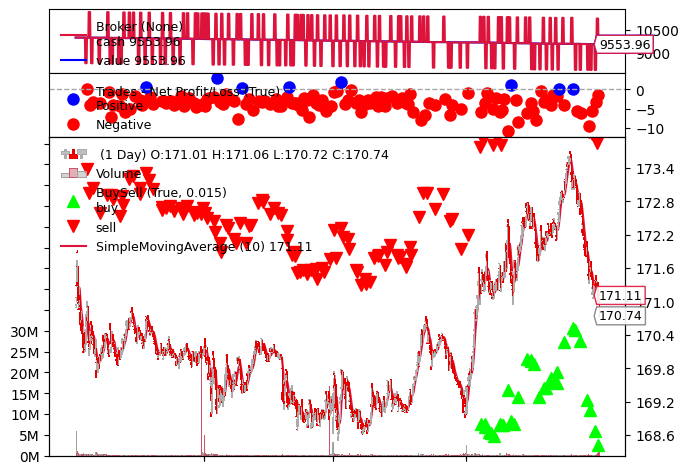

[[<Figure size 640x480 with 4 Axes>]]

In [51]:
cerebro.adddata(data)
   
print('<START> Brokerage account: $%.2f' % cerebro.broker.getvalue())
cerebro.run()
print('<FINISH> Brokerage account: $%.2f' % cerebro.broker.getvalue())
%matplotlib inline
# Plot the strategy
cerebro.plot(style='candlestick',loc='grey', grid=False, iplot=False) #You can leave inside the paranthesis empty

In [52]:
import backtrader.feeds as btfeed
import datetime

cerebro = bt.Cerebro()
cerebro.addstrategy(MAstrategy)
cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.001)

data = btfeed.GenericCSVData(
    dataname='EURUSDTEST.csv',
    nullvalue=0.0,
    dtformat=('%Y-%m-%d'),
    datetime=0,
    high=1,
    low=2,
    open=3,
    close=4,
    volume=5,
    openinterest=-1
)

<START> Brokerage account: $10000.00
2001-01-02, Sell Create, 0.95
2001-01-02, Buy Create, 0.95
2001-01-02, Buy Create, 0.95
2001-01-02, Sell Create, 0.95
2001-01-02, Buy Create, 0.95
2001-01-02, Sell Create, 0.95
2001-01-03, Executed SELL (Price: 0.95, Value: -9.51, Commission 0.01)
2001-01-03, Executed BUY (Price: 0.95, Value: -9.51, Commission 0.01)
2001-01-03, Executed BUY (Price: 0.95, Value: 9.51, Commission 0.01)
2001-01-03, Executed SELL (Price: 0.95, Value: 9.51, Commission 0.01)
2001-01-03, Executed BUY (Price: 0.95, Value: 9.51, Commission 0.01)
2001-01-03, Executed SELL (Price: 0.95, Value: 9.51, Commission 0.01)
2001-01-03, Buy Create, 0.95
2001-01-03, Sell Create, 0.95
2001-01-03, Sell Create, 0.95
2001-01-03, Buy Create, 0.95
2001-01-03, Sell Create, 0.95
2001-01-03, Buy Create, 0.95
2001-01-03, Sell Create, 0.95
2001-01-03, Buy Create, 0.95
2001-01-03, Buy Create, 0.95
2001-01-03, Sell Create, 0.95
2001-01-03, Buy Create, 0.95
2001-01-03, Sell Create, 0.95
2001-01-03, B

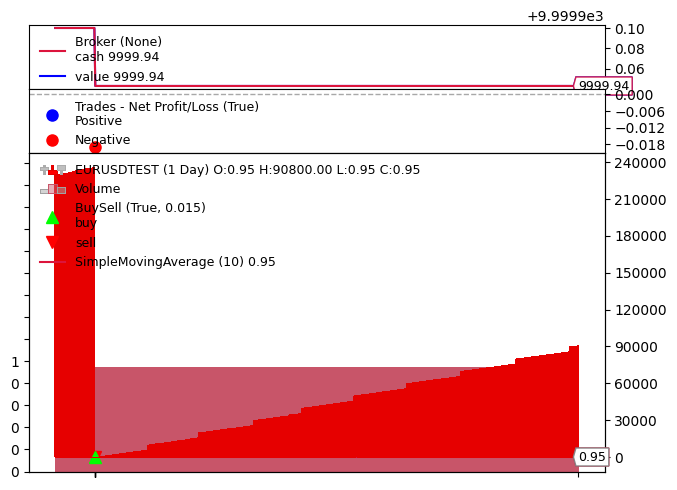

[[<Figure size 640x480 with 4 Axes>]]

In [53]:
cerebro.adddata(data)
   
print('<START> Brokerage account: $%.2f' % cerebro.broker.getvalue())
cerebro.run()
print('<FINISH> Brokerage account: $%.2f' % cerebro.broker.getvalue())
%matplotlib inline
# Plot the strategy
cerebro.plot(style='candlestick',loc='grey', grid=False, iplot=False) #You can leave inside the paranthesis empty